**KELOMPOK 2**

**Ketua Kelompok: M. Ikhwan Farhat (NIM 11210940000007)**

**Anggota Kelompok:**

**1. Nursia (NIM 11210940000002)**

**2. Zahra Khotimah (NIM 11210940000003)**

**3. Febiola br Tarigan (NIM 11210940000015)**

**4. Zahra Tifani Apriliana (NIM 11210940000029)**

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

In [ ]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')

dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [ ]:
#dfD adalah data di kota Depok
#Menampilkan data dari atas, bisa diisi seberapa banyak data ingin ditampilkan, default menampilkan 5 data pertama
dfD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Menampilkan data dari bawah, bisa diisi seberapa banyak data ingin ditampilkan, default menampilkan 5 data pterakhir
dfD.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Menampilkan info yang terdapat dari data Depok
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
#Menampilkan nama kolom yang ada di data Depok
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
dfD.isna().sum()
#Banyaknya data yang kosong

created_at     879
LT             878
LB             880
KT             880
KM             880
garasi         973
carport        904
lokasi         880
sertifikat     880
listrik        895
hadap          936
harga          880
URL            880
deskripsi      880
Unnamed: 14    998
Unnamed: 15    998
Unnamed: 16    998
Unnamed: 17    998
Unnamed: 18    998
Unnamed: 19    998
Unnamed: 20    998
Unnamed: 21    998
Unnamed: 22    998
Unnamed: 23    998
Unnamed: 24    998
Unnamed: 25    998
dtype: int64

In [ ]:
x = dfD.dropna(axis = 0, how = "all")
x

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Depok = x.dropna(axis = 1, how = "all")
Depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Depok.drop(Depok.tail(1).index,inplace=True)

In [ ]:
Dpk = Depok.dropna()
Dpk
#Data depok yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
12,6-12-2021,60,45.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Utara,480.0,https://www.rumah123.com/properti/depok/hos928...,rumah dengan akses jalan raya
15,6-12-2021,57,40.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Utara,390.0,https://www.rumah123.com/properti/depok/hos928...,cluster di sawangan dengan cicilan rendah
22,5-12-2021,75,54.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Utara,450.0,https://www.rumah123.com/properti/depok/hos927...,Rumah Luas Murah Lokasi Cipayung Deok Dekat St...
24,5-12-2021,378,289.0,4.0,4.0,3.0,3.0,Sukmajaya,SHM,5500.0,Timur Laut,7000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,5-12-2021,400,226.0,5.0,4.0,2.0,1.0,Cinere,SHM,2200.0,Selatan,3600.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
32,5-12-2021,151,180.0,3.0,3.0,1.0,1.0,Pancoran Mas,SHM,2200.0,Selatan,3500.0,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
40,5-12-2021,66,45.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Timur,465.0,https://www.rumah123.com/properti/depok/hos928...,"Rumah dijual Murah Promo tanpa dp,Angsuran Rin..."
46,5-12-2021,75,75.0,3.0,2.0,2.0,2.0,Pancoran Mas,SHM,2200.0,Timur,905.0,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 lantai lokasi dalam Cluster dekat tol ...
76,5-12-2021,71,45.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Selatan,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
99,4-12-2021,50,36.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Timur,235.0,https://www.rumah123.com/properti/depok/hos928...,Rumah paling murah di Depok


In [ ]:
Dpk.duplicated().sum()

0

In [ ]:
Dpk.isna().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
a = dfJ.dropna(axis = 0, how = "all")
a

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Jakarta = a.dropna(axis = 1, how = "all")
Jakarta
#Data Jakarta yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
Jkt = Jakarta.dropna()

In [ ]:
Jkt.isna().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
t = dfT.dropna(axis = 0, how = "all")
t

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Tangerang = t.dropna(axis = 1, how = "all")
Tangerang
#Data Tangerang yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [ ]:
Tgr = Tangerang.dropna()

In [ ]:
Tgr.isna().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
Data = pd.concat([Tgr, Dpk, Jkt])
Data
#Penggabungan data dari 3 kota yaitu Jakarta, Depok, dan Tangerang

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,Selatan,1.480000e+02,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Selatan,7.600000e+02,https://www.rumah123.com/properti/tangerang/ho...,Lokasi rumah sangat strategis dekat fasilitas ...
10,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"PONDOK JAGUNG, TANGERANG",SHM,2200.0,Tenggara,6.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,Memiliki lokasi yang strategis yaitu 100 meter...
13,12-06-2021,72.0,40.0,2.0,1.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Timur,5.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,Keamanan 24 jam dan sangat strategis
16,12-06-2021,250.0,360.0,5.0,4.0,1.0,1.0,"BENDA, TANGERANG",SHM,4400.0,Timur,2.900000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki lantai granit, 1 gudang, Water heater..."
40,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,2200.0,Selatan,6.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,BOSTON VILLAGE BSD- BINTARO\nAkses 100 Meter d...
45,12-06-2021,320.0,225.0,3.0,3.0,1.0,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Barat Daya,5.300000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Rumah cluster, siap huni, bersih terawat, ling..."
54,12-06-2021,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,Utara,1.250000e+04,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
55,12-06-2021,250.0,380.0,6.0,4.0,1.0,1.0,"BSD, TANGERANG",SHM,5500.0,Barat,5.050000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Rumah di kawasan BSD, Luas tanah : 250 m2, Lua..."
84,12-06-2021,144.0,117.0,3.0,3.0,1.0,1.0,"BANJAR WIJAYA, TANGERANG",SHM,2200.0,Utara,1.950000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas keamanan, Masjid, Jogging T..."


In [ ]:
Data.info()
#Info dari gabungan data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 7 to 118
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  43 non-null     object 
 1   LT          43 non-null     object 
 2   LB          43 non-null     float64
 3   KT          43 non-null     float64
 4   KM          43 non-null     float64
 5   garasi      43 non-null     float64
 6   carport     43 non-null     float64
 7   lokasi      43 non-null     object 
 8   sertifikat  43 non-null     object 
 9   listrik     43 non-null     float64
 10  hadap       43 non-null     object 
 11  harga       43 non-null     float64
 12  URL         43 non-null     object 
 13  deskripsi   43 non-null     object 
dtypes: float64(7), object(7)
memory usage: 5.0+ KB


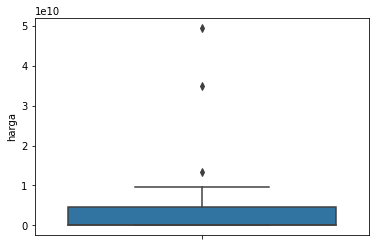

In [ ]:
sns.boxplot(y = Data.harga)

In [ ]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) #Menghitung jumlah data setelah di trim dengan IQR

LB         3.390000e+02
KT         2.500000e+00
KM         2.000000e+00
garasi     1.000000e+00
carport    1.000000e+00
listrik    2.650000e+03
harga      4.524999e+09
dtype: float64


In [ ]:
datadsu = Data[~((Data<(Q1-1.5*IQR))|(Data>(Q3+1.5*IQR))).any(axis=1)]
#Mengecek data setelah di cek dan di remove outlier
datadsu.shape

(36, 14)

In [ ]:
Data.shape

(43, 14)

In [ ]:
u = 43 - 36
print(u)

7


Maka, data yang merupakan outlier dengan kata lain jauh dari data-data yang lain telah dibuang sejumlah 7 dengan menggunakan metode IQR dataset

Text(0.5, 1.0, '')

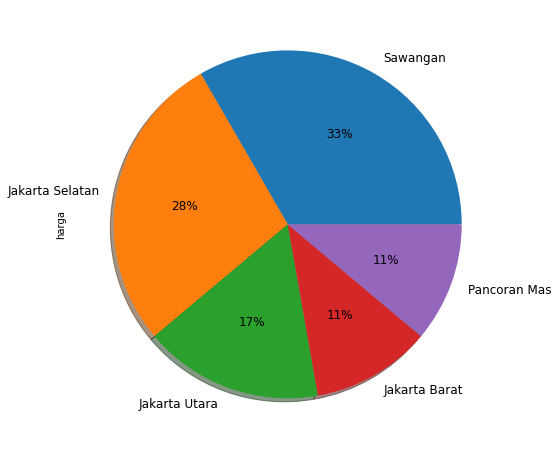

In [ ]:
Seven_house = datadsu.groupby(datadsu['lokasi'])['harga'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
Seven_house.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 12)
plt.title('5 Lokasi Rumah Dari Harga Termahal Sampai Termurah')
#No 3
#Rumah termahal berlokasi di Sawangan
#Rumah termurah berlokasi di Jakarta Barat dan Pancoran Mas

In [ ]:
datadsu.describe(include = 'all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,36,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36,36,36.000000,36,3.600000e+01,36,36
unique,9,28.0,NaN,NaN,NaN,NaN,NaN,20,4,NaN,8,NaN,35,36
top,12-06-2021,72.0,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,Timur,NaN,https://www.rumah.com/listing-properti/dijual-...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
freq,11,2.0,NaN,NaN,NaN,NaN,NaN,6,30,NaN,10,NaN,2,1
mean,NaN,NaN,196.583333,3.666667,2.805556,1.305556,1.361111,NaN,NaN,2730.555556,NaN,1.650001e+09,NaN,NaN
std,NaN,NaN,159.692987,1.585650,1.410561,0.524783,0.542627,NaN,NaN,1355.374370,NaN,2.998928e+09,NaN,NaN
min,NaN,NaN,36.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,1.480000e+02,NaN,NaN
25%,NaN,NaN,47.250000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,4.950000e+02,NaN,NaN
50%,NaN,NaN,164.000000,3.000000,3.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,3.100000e+03,NaN,NaN
75%,NaN,NaN,291.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,3500.000000,NaN,1.900000e+09,NaN,NaN


6. Dari data di atas diperoleh terdapat total 36 lokasi. Dengan Luas Tanah yang ditawarkan tertinggi sebanyak 72.0 berlokasi di Sawangan menghadap ke Timur. Dengan minimal harga sebesar Rp 1.480000e+02, dan maksimal harga sebesar Rp 9.500000e+09.

4. Rumah dengan karakterisitik yang paling banyak dijual adalah rumah dengan luas tanah sebesar 72.0, berlokasi di Sawangan dengan jenis sertifikat properti yang ditawarkan adalah SHM. Dimana rumah menghadap ke Timur.